Davy Ji, davyji2@illinois.edu

Video Link: https://www.youtube.com/watch?v=tozIr1YYzwI

Github Link: https://github.com/davegii/DLH

# Introduction

## Background of the Problem

###Type of Problem:

The problem addressed in the research paper is the prediction of individual phenotypes based on microbiome profiles. Specifically, the study focuses on classifying disease and control sample groups using microbiome data.
###Importance/Meaning of Solving the Problem:

Microbiome profiles have the potential to serve as valuable biomarkers for various diseases. Accurate classification of disease states based on microbiome data can lead to early diagnosis, better understanding of disease mechanisms, and personalized treatment strategies.
###Difficulty of the Problem:

The main challenge in this problem is the high dimensionality of microbiome profiles, which makes the data difficult to handle and analyze. Additionally, the noise and variability in microbiome data can make it challenging to extract meaningful features for accurate disease classification.
###State of the Art Methods and Effectiveness:

The paper compares the proposed DeepMicro framework with the current best approach (MetAML) that directly trains classifiers like SVM and RF on the original microbiome profile. The paper also tests Principal Component Analysis (PCA) and Gaussian Random Projection (RP) as alternative dimensionality reduction methods.

##Paper Explanation

###What Did the Paper Propose:

The paper proposes the DeepMicro framework, a deep representation learning framework for predicting individual phenotypes based on microbiome profiles. The framework involves:

* Using various autoencoders (SAE, DAE, VAE, and CAE) to learn a low-dimensional representation of the microbiome profiles.
* Training three classification models (SVM, RF, and MLP) on the learned representation to discriminate between disease and control sample groups.

###Innovations of the Method:

The innovations of the DeepMicro framework include:

* Using deep autoencoders for dimensionality reduction of high-dimensional microbiome profiles.
* Utilizing the learned representation to train classification models for disease prediction.

###How Well the Proposed Method Work (in its Own Metrics):

The DeepMicro framework outperforms the state-of-the-art methods in most of the tested datasets. For instance:

* AUC scores for DeepMicro:
        IBD: 0.955
        EW-T2D: 0.899
        C-T2D: 0.763
        Obesity: 0.659
        Cirrhosis: 0.940
* For the Colorectal dataset, DeepMicro has slightly lower performance than MetAML (DeepMicro's AUC = 0.803 vs. MetAML's AUC = 0.811).

###Contribution to the Research Regime:

The DeepMicro framework offers a significant advancement in the field of microbiome-based disease prediction. By effectively reducing the dimensionality of high-dimensional microbiome profiles and using deep learning techniques for classification, DeepMicro provides a robust and accurate method for disease prediction. This contributes to the ongoing efforts to leverage microbiome data for early disease diagnosis, personalized medicine, and understanding disease mechanisms.

Microbiome analysis plays a crucial role in understanding the complex interactions between microbial communities and host health. However, analyzing microbiome data poses significant challenges due to its high dimensionality and inherent noise. Traditional methods often struggle to extract meaningful patterns from such data. Therefore, there is a growing interest in leveraging deep learning techniques to effectively analyze microbiome data and improve classification accuracy. The paper's proposed approach involves applying deep learning models, including autoencoders (AE), variational autoencoders (VAE), and convolutional autoencoders (CAE), to learn meaningful representations from microbiome data. I aim to recreate the work presented in the paper by following the instructions for setup and reproducing their work in the github readme.

# Scope of Reproducibility

Initially I had two hypotheses that I wanted to test, but after running the experiment, I found that it would be sufficient to test one hypothesis for the scope of this project.

Hypothesis: Deep learning-based representation learning techniques such as AE, can effectively capture intricate patterns in microbiome data, leading to improved classification performance compared to traditional methods.

# Methodology

The methodology at least contains two subsections **data** and **model** in your experiment.

##Environment
Version: Python 3.6

Dependencies: Other than what was specified in the github quickstart, I noticed it needed h5py version 2.10.0, keras version 2.12.0, which also needs tensorflow version 2.12.0. I have included all imports in this section. This pip install line must be run to import the necessary library later on.

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

##   Model

Citation to Original Paper: Oh M, Zhang L. DeepMicro: deep representation learning for disease prediction based on microbiome data. Sci Rep. 2020 Apr 7;10(1):6026. doi: 10.1038/s41598-020-63159-5. PMID: 32265477; PMCID: PMC7138789, doi: [https://pubmed.ncbi.nlm.nih.gov/32265477/]

Link to Original Repo: https://github.com/minoh0201/DeepMicro/tree/master

The model training is done outside of this notebook, I have shown the training in the Training section and uploaded the trained model in the Results/Evaluation section. The following code is a modified, barebones class taken from the original github repository. The model's main functions load in the data and classify the data based on the specified parameter svm, rf, or mlp. The classification function in the class is modified to pull in the trained parameters, and output the training results.

In [ ]:
# importing numpy, pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn import cluster
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

#importing keras
import keras
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback
from keras.models import Model, load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Flatten, Reshape, Cropping2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy

# importing util libraries
import datetime
import time
import math
import os
import importlib
import csv
import requests


In [ ]:
def mlp_model(input_dim, numHiddenLayers=3, numUnits=64, dropout_rate=0.5):

    model = Sequential()

    #Check number of hidden layers
    if numHiddenLayers >= 1:
        # First Hidden layer
        model.add(Dense(numUnits, input_dim=input_dim, activation='relu'))
        model.add(Dropout(dropout_rate))

        # Second to the last hidden layers
        for i in range(numHiddenLayers - 1):
            numUnits = numUnits // 2
            model.add(Dense(numUnits, activation='relu'))
            model.add(Dropout(dropout_rate))

        # output layer
        model.add(Dense(1, activation='sigmoid'))

    else:
        # output layer
        model.add(Dense(1, input_dim=input_dim, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', )#metrics=['accuracy'])

    return model

# Classification
class DeepMicrobiome(object):
    def __init__(self, data, seed, data_dir):
        self.t_start = time.time()
        self.filename = str(data)
        self.data = self.filename.split('.')[0]
        self.seed = seed
        self.data_dir = data_dir
        self.prefix = ''
        self.representation_only = False
    def loadData(self, feature_string, label_string, label_dict, dtype=None):
        # read file
        filename = self.data_dir + self.filename

        raw = pd.read_csv(filename, sep='\t', index_col=0, header=None)


        # select rows having feature index identifier string
        X = raw.loc[raw.index.str.contains(feature_string, regex=False)].T

        # get class labels
        Y = raw.loc[label_string] #'disease'
        Y = Y.replace(label_dict)

        # train and test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X.values.astype(dtype), Y.values.astype('int'), test_size=0.2, random_state=self.seed, stratify=Y.values)
        self.printDataShapes()
    def printDataShapes(self, train_only=False):
        print("X_train.shape: ", self.X_train.shape)
        if not train_only:
            print("y_train.shape: ", self.y_train.shape)
            print("X_test.shape: ", self.X_test.shape)
            print("y_test.shape: ", self.y_test.shape)
    def create_visualizations(self, num_features=5):
        df = pd.DataFrame(self.X_test[:5])
        # Scatter plot matrix
        df.plot()
    def classification(self, hyper_parameters, method='svm', cv=5, scoring='roc_auc', n_jobs=1, cache_size=10000):
        clf_start_time = time.time()

        print("# Tuning hyper-parameters")
        print(self.X_train.shape, self.y_train.shape)

        # Support Vector Machine
        if method == 'svm':
            clf = GridSearchCV(SVC(probability=True, cache_size=cache_size), hyper_parameters, cv=StratifiedKFold(cv, shuffle=True), scoring=scoring, n_jobs=n_jobs, verbose=100, )
            clf.fit(self.X_train, self.y_train)

        # Random Forest
        if method == 'rf':
            clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), hyper_parameters, cv=StratifiedKFold(cv, shuffle=True), scoring=scoring, n_jobs=n_jobs, verbose=100)
            clf.fit(self.X_train, self.y_train)

        # Multi-layer Perceptron
        if method == 'mlp':
            model = KerasClassifier(build_fn=mlp_model, input_dim=self.X_train.shape[1], verbose=0, )
            clf = GridSearchCV(estimator=model, param_grid=hyper_parameters, cv=StratifiedKFold(cv, shuffle=True), scoring=scoring, n_jobs=n_jobs, verbose=100)
            clf.fit(self.X_train, self.y_train, batch_size=32)

        # Gradient Boosting
        if method == 'gb':
            clf = GridSearchCV(GradientBoostingClassifier(), hyper_parameters, cv=StratifiedKFold(cv, shuffle=True), scoring=scoring, n_jobs=n_jobs, verbose=100)
            clf.fit(self.X_train, self.y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)

        # Evaluate performance of the best model on test set
        y_true, y_pred = self.y_test, clf.predict(self.X_test)
        y_prob = clf.predict_proba(self.X_test)

        # Performance Metrics: AUC, ACC, Recall, Precision, F1_score
        metrics = [round(roc_auc_score(y_true, y_prob[:, 1]), 4),
                   round(accuracy_score(y_true, y_pred), 4),
                   round(recall_score(y_true, y_pred), 4),
                   round(precision_score(y_true, y_pred), 4),
                   round(f1_score(y_true, y_pred), 4), ]

        # time stamp
        metrics.append(str(datetime.datetime.now()))

        # running time
        metrics.append(round( (time.time() - self.t_start), 2))

        # classification time
        metrics.append(round( (time.time() - clf_start_time), 2))

        # best hyper-parameter append
        metrics.append(str(clf.best_params_))


        print('Accuracy metrics')
        print('AUC, ACC, Recall, Precision, F1_score, time-end, runtime(sec), classfication time(sec), best hyper-parameter')
        print(metrics)



##  Data

Data download instruction: Data was given in github from the paper. You can download it by accessing the link. Link to the raw datasets: https://github.com/minoh0201/DeepMicro/tree/master/data

Data descriptions with helpful charts and visualizations: I did try to display the data, but the code I tried to run was taking too long. I also don't think the data has much to say about it. However, I will print out the shapes of the data postprocessed after running the code. There is a cross validation split during training, the default is 80/20 for train/test, respectively. There is also a label dictionary in the code below that translates strings to numbers.



In [ ]:
seed  =1
data = 'marker_WT2D'
data_dir = 'https://raw.githubusercontent.com/davegii/DLH/main/'
dataType =  'float64'
dm = DeepMicrobiome(data=data + '.txt', seed=seed, data_dir=data_dir)

## specify feature string
feature_string = ''
data_string = str(data)
if data_string.split('_')[0] == 'abundance':
   feature_string = "k__"
if data_string.split('_')[0] == 'marker':
   feature_string = "gi|"
label_dict = {
        # Controls
        'n': 0,
        # Chirrhosis
        'cirrhosis': 1,
        # Colorectal Cancer
        'cancer': 1, 'small_adenoma': 0,
        # IBD
        'ibd_ulcerative_colitis': 1, 'ibd_crohn_disease': 1,
        # T2D and WT2D
        't2d': 1,
        # Obesity
        'leaness': 0, 'obesity': 1,
    }
dtypeDict = {"float16": np.float16, "float32": np.float32, "float64": np.float64}
## load data into the object
dm.loadData(feature_string=feature_string, label_string='disease', label_dict=label_dict, dtype=dtypeDict[dataType])

<ipython-input-7-d553c841018b>:42: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(filename, sep='\t', index_col=0, header=None)


X_train.shape:  (76, 83456)
y_train.shape:  (76,)
X_test.shape:  (20, 83456)
y_test.shape:  (20,)


##Training


###Computational Requirements

I ran it locally with a Core i-7-9750H and a RTX 2060, the runtimes are printed at the bottom of this section, where I display the results.txt (column 6). We can see that each experiment takes about 8 minutes. In total we had 5 experiments.

###Hyperparameters

These are the hyperparameters to be used after training. The below are also displayed in the 'Table of results' Section:

hyper_parameters['svm'] = {'C': [8], 'gamma': [0.0001220703125], 'kernel': ['rbf']}
hyper_parameters['rf'] = {'criterion': ['gini'], 'max_features': ['log2'], 'min_samples_leaf': [3], 'n_estimators': [500]}
hyper_parameters['mlp'] = {'dropout_rate': [0.3], 'epochs': [30], 'numHiddenLayers': [2], 'numUnits': [100]}

###Implementation Code

I followed the instructions of setting up according to the github readme of the original paper. Here are the specific commands I used on my local computer. I was unable to install conda on this colab.

In [ ]:
'''
!git clone https://github.com/minoh0201/DeepMicro
!cd DeepMicro
!conda create --name deep_env python=3.6
!source activate deep_env
!pip install --upgrade pip && pip install numpy==1.16.2 && pip install pandas==0.24.2 && pip install scipy==1.2.1 && pip install scikit-learn==0.20.3 && pip install matplotlib==3.0.3 && pip install psutil==5.6.1 && pip install keras==2.2.4
!pip install tensorflow==1.13.1
!pip install tensorflow-gpu==1.13.1
!python /content/DeepMicro/DM.py -h
python DM.py -d marker_WT2D --ae -dm 256
'''

'\n!git clone https://github.com/minoh0201/DeepMicro\n!cd DeepMicro\n!conda create --name deep_env python=3.6\n!source activate deep_env\n!pip install --upgrade pip && pip install numpy==1.16.2 && pip install pandas==0.24.2 && pip install scipy==1.2.1 && pip install scikit-learn==0.20.3 && pip install matplotlib==3.0.3 && pip install psutil==5.6.1 && pip install keras==2.2.4\n!pip install tensorflow==1.13.1\n!pip install tensorflow-gpu==1.13.1\n!python /content/DeepMicro/DM.py -h\n'

Initially, I had tried to run the following to install conda on this colab, according to this stackoverflow: https://stackoverflow.com/questions/53031430/conda-environment-in-google-colab-google-colaboratory
But I was unsuccessful.

In [ ]:
#!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh

#!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

#!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local


Since I was unsuccessful trying to setup in the colab, I decided to just show the results here after running it locally. Below the results of the trained model in the marker_WT2D_result.txt file. There are 5 experiments run on svm, rf and mlp, so there are a total of 15 results printed out.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/davegii/DLH/main/marker_WT2D_result.txt',header = None)
print(df)

              0       1     2       3       4       5  \
0   AE[256]_svm  0.9394  0.80  0.8182  0.8182  0.8182   
1    AE[256]_rf  0.9091  0.85  0.9091  0.8333  0.8696   
2   AE[256]_mlp  0.8889  0.85  0.8182  0.9000  0.8571   
3   AE[256]_svm  0.8586  0.55  1.0000  0.5500  0.7097   
4    AE[256]_rf  0.9495  0.95  1.0000  0.9167  0.9565   
5   AE[256]_mlp  0.8182  0.70  0.5455  0.8571  0.6667   
6   AE[256]_svm  0.7879  0.55  1.0000  0.5500  0.7097   
7    AE[256]_rf  0.6970  0.65  0.5455  0.7500  0.6316   
8   AE[256]_mlp  0.7071  0.65  0.4545  0.8333  0.5882   
9   AE[256]_svm  0.8384  0.70  0.6364  0.7778  0.7000   
10   AE[256]_rf  0.7778  0.70  0.7273  0.7273  0.7273   
11  AE[256]_mlp  0.8384  0.75  0.8182  0.7500  0.7826   
12  AE[256]_svm  0.6061  0.70  0.5455  0.8571  0.6667   
13   AE[256]_rf  0.7778  0.75  0.7273  0.8000  0.7619   
14  AE[256]_mlp  0.6667  0.65  0.6364  0.7000  0.6667   

                             6       7       8  \
0   2024-04-07 19:23:42.017900  176.8

# Results/Evaluation




##Table of results
Discuss with respect to the hypothesis and results from the original paper:
The original hypothesis we were going to test is: Deep learning-based representation learning techniques such as AE, can effectively capture intricate patterns in microbiome data, leading to improved classification performance compared to traditional methods.

The research paper had a figure showing Deepmicro results compared to other models. Specifically we will look at figure 2: https://www.nature.com/articles/s41598-020-63159-5/figures/2

In the graph for the EW-T2D, which is the dataset we ran Deepmicro on, we can see that the AUC for SAE-RF is around 0.9, which below in the 'Analysis' section, is accurate. SAE-SVM is even higher than SAE-RF in the 'Analysis' section, even though the paper only chose to show RF. This shows Deepmicro can effectively capture intricate patterns in microbiome data, leading to improved classification performance compared to traditional methods, based on AUC shown in the chart.

Here we will be using the first run of the experiment result (shown above) as the hyperparameters. The AUC, ACC, Recall, Precision, F1_score, time-end, runtime(sec), classification time(sec) were already printed above in the experiment result, but they are printed again after running the code when loading the trained model.

In [ ]:
#Hyperparameters that were calculated during the experiment
hyper_parameters= {}
hyper_parameters['svm'] = {'C': [8], 'gamma': [0.0001220703125], 'kernel': ['rbf']}
hyper_parameters['rf'] = {'criterion': ['gini'], 'max_features': ['log2'], 'min_samples_leaf': [3], 'n_estimators': [500]}
hyper_parameters['mlp'] = {'dropout_rate': [0.3], 'epochs': [30], 'numHiddenLayers': [2], 'numUnits': [100]}

# Classification
dm.classification(method='svm', hyper_parameters = hyper_parameters['svm'])
dm.classification(method='rf', hyper_parameters = hyper_parameters['rf'])
dm.classification(method='mlp', hyper_parameters = hyper_parameters['mlp'])

# Tuning hyper-parameters
(76, 83456) (76,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=8, gamma=0.0001220703125, kernel=rbf......................
[CV 1/5; 1/1] END C=8, gamma=0.0001220703125, kernel=rbf;, score=0.603 total time=   1.3s
[CV 2/5; 1/1] START C=8, gamma=0.0001220703125, kernel=rbf......................
[CV 2/5; 1/1] END C=8, gamma=0.0001220703125, kernel=rbf;, score=0.537 total time=   2.0s
[CV 3/5; 1/1] START C=8, gamma=0.0001220703125, kernel=rbf......................
[CV 3/5; 1/1] END C=8, gamma=0.0001220703125, kernel=rbf;, score=0.518 total time=   2.1s
[CV 4/5; 1/1] START C=8, gamma=0.0001220703125, kernel=rbf......................
[CV 4/5; 1/1] END C=8, gamma=0.0001220703125, kernel=rbf;, score=0.911 total time=   1.4s
[CV 5/5; 1/1] START C=8, gamma=0.0001220703125, kernel=rbf......................
[CV 5/5; 1/1] END C=8, gamma=0.0001220703125, kernel=rbf;, score=0.929 total time=   1.3s
Best parameters set found on development s

<ipython-input-7-d553c841018b>:83: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=mlp_model, input_dim=self.X_train.shape[1], verbose=0, )


1/1 [==============================] - 0s 63ms/step
[CV 1/5; 1/1] END dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100;, score=0.587 total time=   6.2s
[CV 2/5; 1/1] START dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100
1/1 [==============================] - 0s 57ms/step
[CV 2/5; 1/1] END dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100;, score=0.852 total time=   6.9s
[CV 3/5; 1/1] START dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100
1/1 [==============================] - 0s 58ms/step
[CV 3/5; 1/1] END dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100;, score=0.661 total time=   6.2s
[CV 4/5; 1/1] START dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100
1/1 [==============================] - 0s 62ms/step
[CV 4/5; 1/1] END dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100;, score=0.804 total time=   7.0s
[CV 5/5; 1/1] START dropout_rate=0.3, epochs=30, numHiddenLayers=2, numUnits=100
1/1 [===============

## Model comparison

The above already showed the difference in accuracy metrics between the three models. There are also model loss results that were shown after training. Below, they are shown across the five training experiments.

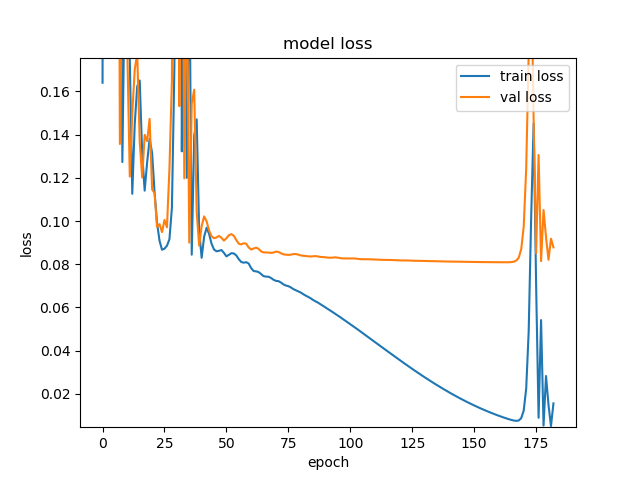

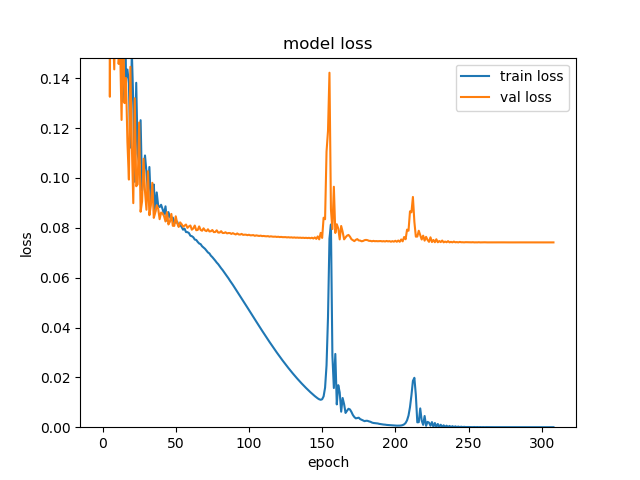

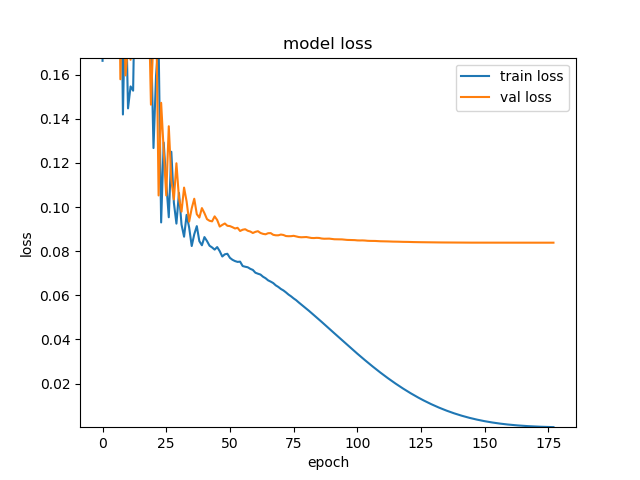

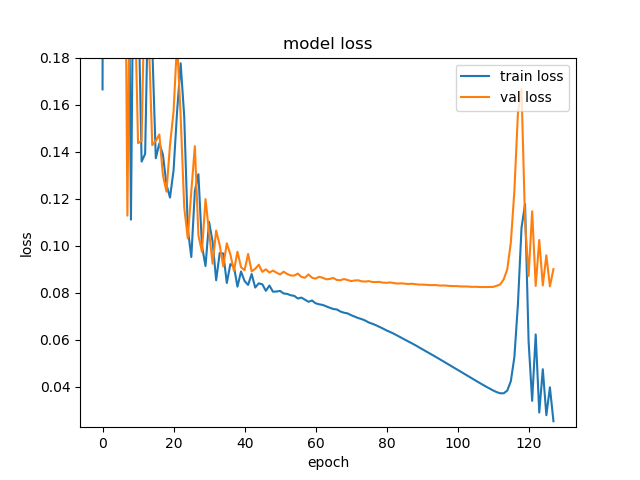

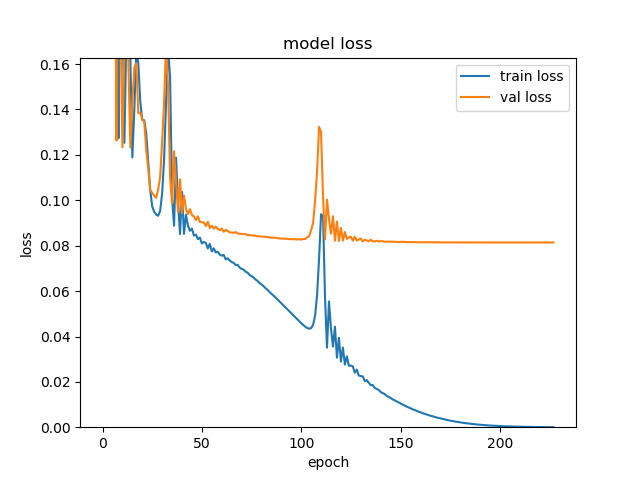

In [ ]:
# define dirs to workspace and data

from google.colab.patches import cv2_imshow
import cv2
for i in range(5):
  img_dir = f'https://github.com/davegii/DLH/raw/main/AE[256]_marker_WT2D_{i}.png'

  response = requests.get(img_dir)
  img_array = np.frombuffer(response.content, np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

  cv2_imshow(img)

##Analysis
AUC, ACC, Recall, Precision, F1_score

AE[256]_svm,0.9697, 0.85, 0.7273, 1.0, 0.8421

AE[256]_rf,0.8788, 0.8, 0.7273, 0.8889, 0.8

AE[256]_mlp,0.8283, 0.75, 0.9091, 0.7143, 0.8

Every time the code above runs, the results change a little bit, but in general. We can see SVM has the highest AUC and ACC and F1_score. MLP has the highest recall.


##Ablation Study

Initially, in my project proposal I proposed implementing a traditional autoencoder to compare the quality and utility of the learned representations. However, after looking into the paper's code repository, I discovered they already had one. I switched my ablation to see how a Gradient Boosting classifier would compare to the original classifiers. Here are the results after training. Keep in mind we only want the results ending in '_gb'. We can see that through the multiple hyperparameters, GB is not performing as well until it reaches the hyperparameter of '{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}', which has an AUC of .899.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/davegii/DLH/main/ablation_results.txt',header = None)
print(df)

              0       1     2       3       4       5  \
0   AE[256]_svm  0.8384  0.55  1.0000  0.5500  0.7097   
1    AE[256]_rf  0.8788  0.85  1.0000  0.7857  0.8800   
2   AE[256]_mlp  0.8687  0.80  0.9091  0.7692  0.8333   
3    AE[256]_gb  0.6566  0.45  0.2727  0.5000  0.3529   
4   AE[256]_svm  0.8586  0.55  1.0000  0.5500  0.7097   
5    AE[256]_rf  0.9040  0.90  0.9091  0.9091  0.9091   
6   AE[256]_mlp  0.7576  0.65  0.5455  0.7500  0.6316   
7    AE[256]_gb  0.6768  0.55  0.6364  0.5833  0.6087   
8   AE[256]_svm  0.8081  0.55  1.0000  0.5500  0.7097   
9    AE[256]_rf  0.6566  0.70  0.5455  0.8571  0.6667   
10  AE[256]_mlp  0.7576  0.75  0.6364  0.8750  0.7368   
11   AE[256]_gb  0.6970  0.65  0.6364  0.7000  0.6667   
12  AE[256]_svm  0.8081  0.80  1.0000  0.7333  0.8462   
13   AE[256]_rf  0.7980  0.70  0.8182  0.6923  0.7500   
14  AE[256]_mlp  0.7778  0.70  0.9091  0.6667  0.7692   
15   AE[256]_gb  0.8788  0.65  1.0000  0.6111  0.7586   
16  AE[256]_svm  0.5354  0.35  

Here I specify that hyperparameter to get a closer look at the data.

In [ ]:
hyper_parameters['gb'] = {'learning_rate': [0.1], 'max_depth': [5], 'min_samples_split': [10], 'n_estimators': [500]}

# Classification

dm.classification(method='gb', hyper_parameters = hyper_parameters['gb'])

# Tuning hyper-parameters
(76, 83456) (76,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500
[CV 1/5; 1/1] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500;, score=0.349 total time=  30.5s
[CV 2/5; 1/1] START learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500
[CV 2/5; 1/1] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500;, score=0.556 total time=  27.8s
[CV 3/5; 1/1] START learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500
[CV 3/5; 1/1] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500;, score=0.411 total time=  28.4s
[CV 4/5; 1/1] START learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500
[CV 4/5; 1/1] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500;, score=0.500 total time=  31.9s
[CV 5/5; 1/1] START learning_rate=0.1, max_de

Here the AUC is lower than when trained, at .8384, it is actually higher than the AUC of mlp shown in the "Table of results" section, which was .8283. It is also important to note that GB was trained with a smaller range of hyperparameters than the other 3, so outperforming even one classifier is impressive. In conclusion, this shows that the GB classifier can outperform the MLP classifier, and would be a good classifer to add on.

# Discussion

Implications of the experimental results: In conclusion, Deepmicro can effectively capture intricate patterns in microbiome data, leading to improved classification performance compared to traditional methods, based on AUC shown in the chart.

Whether the original paper was reproducible: I believe the original paper was fairly reproducible. Figuring out some of the anaconda environment was a bit bumpy, but overall I am satisfied with the documentation and reproducibility.

What was easy: Following the paper's README and its instructions were very easy, since there weren't many steps, and all the steps were fairly short.

What was difficult: When modifying the code to fit the purposes of this colab rubric, it was also a big challenge. Luckily, there wasn't too many different functions to track, and so it was not as time consuming as initially thought to backtrack the __main__ of the python script and modify what functions were being called.

Recommendations to the original authors or others who work in this area for improving reproducibility: While I am satisfied with the documentation and reproducibility, there is nothing wrong with more added documentation. Specifically, a section specifying what all the additional arguments when running the commands would be very nice.


# References

1.   Oh M, Zhang L. DeepMicro: deep representation learning for disease prediction based on microbiome data. Sci Rep. 2020 Apr 7;10(1):6026. doi: 10.1038/s41598-020-63159-5. PMID: 32265477; PMCID: PMC7138789, doi: [https://pubmed.ncbi.nlm.nih.gov/32265477/]

